## Library

In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## Dataset

In [2]:
df = pd.read_csv(os.getcwd() + "/Dataset/clean_creditcard.csv")
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class_Category,Stan_Amount
879,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041844
880,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.619997
881,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,-0.181887


## Tran-Test Split

In [3]:
X = df.drop(['Class_Category'], axis=1)
y = df[['Class_Category']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(617, 30)
(265, 30)
(617, 1)
(265, 1)


In [6]:
# check fraud/genuine distribution
print(np.mean(y_train))
print(np.mean(y_test))

0.5040518638573744
0.49056603773584906


## Model Fitting

In [7]:
lr_Object  = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                fit_intercept=True, intercept_scaling=1,
                                max_iter=500, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
lr_Object

LogisticRegression(max_iter=500, multi_class='auto', solver='liblinear')

In [8]:
lr_Object.fit(X_train, y_train.values.ravel())

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='auto', solver='liblinear')

## Model Predict

In [9]:
y_pred = lr_Object.predict(X_test)

## Accuracy

In [18]:
is_correct= y_pred==y_test.values.ravel()
np.mean(is_correct)

0.9358490566037736

In [14]:
lr_Object.score(X_test,y_test)

0.9358490566037736

In [17]:
metrics.accuracy_score(y_test,y_pred)

0.9358490566037736

## True/False Positive & Negative Rates

In [22]:
# positive
P = sum(y_test.values.ravel())
P

130

In [23]:
# true positive
TP = sum( (y_test.values.ravel()==1) & (y_pred==1) )
TP

116

In [24]:
# true positive rate
TPR = TP/P
print(TPR)

0.8923076923076924


In [25]:
# false negative
FN = sum( (y_test.values.ravel()==1) & (y_pred==0) )
print(FN)

14


In [26]:
# false negative rate
FNR = FN/P
print(FNR)

0.1076923076923077


In [27]:
# negative
N= sum(y_test.values.ravel()==0)
print(N)

135


In [28]:
# true negative
TN= sum((y_test.values.ravel()==0) & (y_pred==0))
print(TN)

132


In [29]:
# false postive
FP = sum((y_test.values.ravel()==0) & (y_pred==1))
print(FP)

3


In [30]:
# true negative rate & false positive rate
TNR = TN/N
FPR = FP/N
print('the true negative rate is {} and the false positive rate is {}'. format(TNR,FPR))

the true negative rate is 0.9777777777777777 and the false positive rate is 0.022222222222222223


## Confusion Matrix

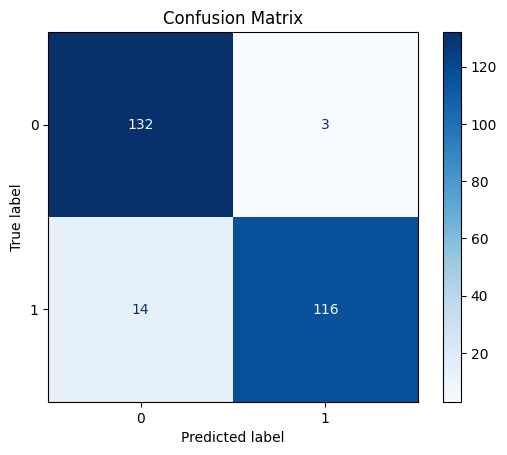

In [35]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.show()

## Classification Metrics

In [36]:
# precesion
Precision = TP/ (TP+FP)
print(Precision)

0.9747899159663865


In [37]:
# recall
Recall = TP/ (TP+FN)
print(Recall)

0.8923076923076924


In [38]:
# F1
F1Score = 2*((Precision * Recall)/(Precision+Recall))
print(F1Score)

0.9317269076305221


In [41]:
# classification report
print(f"Classification Report : \n {classification_report(y_test, y_pred)}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       135
           1       0.97      0.89      0.93       130

    accuracy                           0.94       265
   macro avg       0.94      0.94      0.94       265
weighted avg       0.94      0.94      0.94       265

